In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
churn_df=pd.read_csv("ChurnData.csv")
churn_df.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


In [3]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [4]:
churn_df=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn']]
churn_df['churn']=churn_df['churn'].astype('int')
churn_df.shape

(200, 28)

In [5]:
X=np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat']])
X[0:5]

array([[1.10000e+01, 3.30000e+01, 7.00000e+00, 1.36000e+02, 5.00000e+00,
        5.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 4.40000e+00,
        2.07500e+01, 0.00000e+00, 1.52500e+01, 3.57000e+01, 4.20000e+01,
        2.11450e+02, 1.25000e+02, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 1.48200e+00, 3.03300e+00,
        4.91300e+00, 4.00000e+00],
       [3.30000e+01, 3.30000e+01, 1.20000e+01, 3.30000e+01, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.45000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.88800e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.24600e+00, 3.24000e+00,
        3.49700e+00, 1.00000e+00],
       [2.30000e+01, 3.00000e+01, 9.00000e+00, 3.00000e+01, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.30000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000

In [6]:
y=np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [7]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673, -0.74922681,
         0.48126577, -0.80905935,  0.06044721,  1.08826163, -0.71940664,
        -0.36132818, -0.55974431,  1.54590766,  1.62368828, -0.88640526,
         1.0944415 ,  1.08347268, -0.88640526, -0.97509593, -0.69987184,
         1.28150384,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148, -0.23718629,
        -0.84846321, -0.80905935, -0.97385292, -0.56616669, -0.38801572,
        -0.61983235, -0.69284848, -0.64686916, -0.61588176, -0.88640526,
        -0.91370804, -0.92295821, -0.88640526,  0.07226665,  0.03858151,
        -0.60481397, -1.36987221],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148, -0.5565779 ,
        -0.84846321, -0.80905935, -0.97385292, -0.5661

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 27) (160,)
Test set: (40, 27) (40,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [11]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.60722328, 0.39277672],
       [0.61809654, 0.38190346],
       [0.58411229, 0.41588771],
       [0.65417657, 0.34582343],
       [0.57846128, 0.42153872],
       [0.60571723, 0.39428277],
       [0.49465243, 0.50534757],
       [0.63096405, 0.36903595],
       [0.37261192, 0.62738808],
       [0.57501555, 0.42498445],
       [0.43796261, 0.56203739],
       [0.56949003, 0.43050997],
       [0.52659009, 0.47340991],
       [0.38212909, 0.61787091],
       [0.68571532, 0.31428468],
       [0.52974013, 0.47025987],
       [0.49534501, 0.50465499],
       [0.54486783, 0.45513217],
       [0.42671406, 0.57328594],
       [0.58188784, 0.41811216],
       [0.50068924, 0.49931076],
       [0.41069809, 0.58930191],
       [0.80418638, 0.19581362],
       [0.34302289, 0.65697711],
       [0.43713534, 0.56286466],
       [0.75147663, 0.24852337],
       [0.39496994, 0.60503006],
       [0.42173992, 0.57826008],
       [0.53615371, 0.46384629],
       [0.82329995, 0.17670005],
       [0.

In [12]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.625

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 7  8]
 [ 7 18]]


Confusion matrix, without normalization
[[ 7  8]
 [ 7 18]]


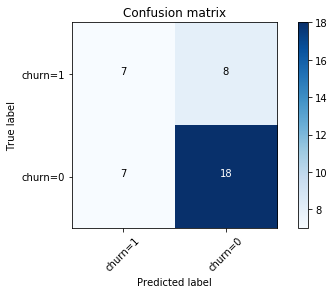

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [15]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71        25
           1       0.50      0.47      0.48        15

    accuracy                           0.62        40
   macro avg       0.60      0.59      0.59        40
weighted avg       0.62      0.62      0.62        40



In [16]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6328239710889156